In [1]:
print("Hello World!")

Hello World!


In [2]:
# importing relevant modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import uniform
from datetime import datetime

## Capital Bike Share

## Loading Daily Dataset

In [3]:
# loading csv file
day=pd.read_csv(r"C:\Users\godwi\OneDrive\Desktop\Bike Sharing Analysis\CBS_2011-2012_daily.csv", sep=None)

C:\Users\godwi\AppData\Local\Temp\ipykernel_26616\530290872.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  day=pd.read_csv(r"C:\Users\godwi\OneDrive\Desktop\Bike Sharing Analysis\CBS_2011-2012_daily.csv", sep=None)


In [4]:
# getting summary of Data set
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Data Wrangling

Checking for missing values

In [5]:
day.isnull().sum()

#There are no missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Renaming some features

In [6]:
## renaming some features
day.rename(columns={'cnt':"Total_rides","hr":"Hour","windspeed":"Windspeed","is_holiday":"Is_holiday","holiday":"Holiday","workingday":"Workingday", "hum":"Relative humidty (%)","dteday":"Date","season":"Season","casual":"Casual","registered":"Registered","atemp":"Apparent Temperature(°C)" ,"temp":"Temperature(°C)"}, inplace=True)

In [7]:
day.drop(["yr","mnth","weathersit", "weekday"], inplace=True, axis=1)

In [8]:
day.head()

,instant,Date,Season,Holiday,Workingday,Temperature(°C),Apparent Temperature(°C),Relative humidty (%),Windspeed,Casual,Registered,Total_rides
0,1,2011-01-01,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Creating of new columns

In [9]:
#Year
# Extract year from the 'Date' column
day['Year'] = pd.to_datetime(day['Date']).dt.year

In [10]:
day.loc[day['Holiday'] == 0, 'Is_holiday'] = 'No'
day.loc[day['Holiday'] == 1, 'Is_holiday'] = 'Yes'

In [11]:
#Season
# Function to get season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Function to categorize season based on date
def categorize_season(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_season(month)

# Apply function to create a new column
day['Season'] = day['Date'].apply(categorize_season)


In [12]:
##WEEKDAY
# Function to get weekday
def get_weekday(day):
    weekdays = ["Mon.", "Tue.", "Wed.", "Thur.", "Fri.", "Sat.", "Sun."]
    return weekdays[day]

# Function to categorize weekday based on date
def categorize_week(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    weekday = dt.weekday()  # 0 for Monday, 1 for Tuesday, ..., 6 for Sunday
    return get_weekday(weekday)

# Apply function to create a new column
day['Weekday'] = day['Date'].apply(categorize_week)

In [13]:
def categorize_day(Weekday):
    if Weekday in ['Mon.', 'Tue.', 'Wed.', 'Thur.', 'Fri.']:
        return 'Workingday'
    else:
        return 'Weekend'

# Apply this function to create a new column 'Day_cat'
day['Workingday'] = day['Weekday'].apply(categorize_day)


In [14]:
day.loc[day['Workingday'] == "Weekend", 'Workingday'] = 'No'
day.loc[day['Workingday'] == "Workingday", 'Workingday'] = 'Yes'

In [15]:
#Month
# Function to get month
def get_month(month):
    months = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
    return months[month - 1]

# Function to categorize month based on date
def categorize_month(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_month(month)

# Apply function to create a new column
day['Month'] = day['Date'].apply(categorize_month)

In [16]:
day.head()

,instant,Date,Season,Holiday,Workingday,Temperature(°C),Apparent Temperature(°C),Relative humidty (%),Windspeed,Casual,Registered,Total_rides,Year,Is_holiday,Weekday,Month
0,1,2011-01-01,Winter,0,No,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,No,Sat.,Jan.
1,2,2011-01-02,Winter,0,No,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,No,Sun.,Jan.
2,3,2011-01-03,Winter,0,Yes,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,No,Mon.,Jan.
3,4,2011-01-04,Winter,0,Yes,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,No,Tue.,Jan.
4,5,2011-01-05,Winter,0,Yes,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,No,Wed.,Jan.


In [17]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant                   731 non-null    int64  
 1   Date                      731 non-null    object 
 2   Season                    731 non-null    object 
 3   Holiday                   731 non-null    int64  
 4   Workingday                731 non-null    object 
 5   Temperature(°C)           731 non-null    float64
 6   Apparent Temperature(°C)  731 non-null    float64
 7   Relative humidty (%)      731 non-null    float64
 8   Windspeed                 731 non-null    float64
 9   Casual                    731 non-null    int64  
 10  Registered                731 non-null    int64  
 11  Total_rides               731 non-null    int64  
 12  Year                      731 non-null    int32  
 13  Is_holiday                731 non-null    object 
 14  Weekday   

2011 Data Frame

In [18]:
# Convert 'Date' column to datetime type
day['Date'] = pd.to_datetime(day['Date'])

# Filter the DataFrame for rows where the year is 2011
day_2011 = day[day["Date"].dt.year == 2011]


In [19]:
# resetting index
day_2011.reset_index(inplace=True)
#dropping the index column
day_2011.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_26616\2001717278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_2011.drop(["index"],axis=1, inplace=True)


In [20]:
day_2011.shape

(365, 16)

2012 Data Frame

In [21]:
# Convert 'Date' column to datetime type
day['Date'] = pd.to_datetime(day['Date'])

# Filter the DataFrame for rows where the year is 2011
day_2012 = day[day["Date"].dt.year == 2012]


In [22]:
# resetting index
day_2012.reset_index(inplace=True)
#dropping the index column
day_2012.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_26616\3435614798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_2012.drop(["index"],axis=1, inplace=True)


In [23]:
day_2012.shape

(366, 16)

## Exploratory Data Analysis

In [24]:
day_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   instant                   366 non-null    int64         
 1   Date                      366 non-null    datetime64[ns]
 2   Season                    366 non-null    object        
 3   Holiday                   366 non-null    int64         
 4   Workingday                366 non-null    object        
 5   Temperature(°C)           366 non-null    float64       
 6   Apparent Temperature(°C)  366 non-null    float64       
 7   Relative humidty (%)      366 non-null    float64       
 8   Windspeed                 366 non-null    float64       
 9   Casual                    366 non-null    int64         
 10  Registered                366 non-null    int64         
 11  Total_rides               366 non-null    int64         
 12  Year                  

Season Analysis

Text(0.5, 1.0, 'Season wise Distribution of Bike Total Rides 2012')

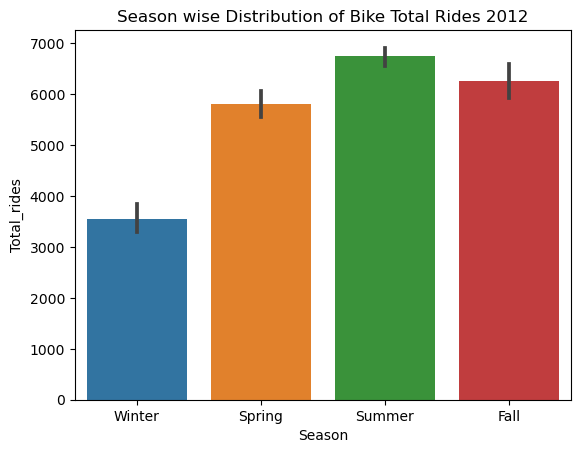

In [25]:
sns.barplot(x="Season", y="Total_rides",
             #hue="Season",
             data=day_2012,)
plt.title("Season wise Distribution of Bike Total Rides 2012")

In [26]:
season_analysis_2012=day_2012.iloc[:,[2,9,10,11]]

In [27]:
season_analysis_2012_copy= season_analysis_2012.copy()
season_analysis_2012

,Season,Casual,Registered,Total_rides
0,Winter,686,1608,2294
1,Winter,244,1707,1951
2,Winter,89,2147,2236
3,Winter,95,2273,2368
4,Winter,140,3132,3272
...,...,...,...,...
361,Winter,247,1867,2114
362,Winter,644,2451,3095
363,Winter,159,1182,1341
364,Winter,364,1432,1796


In [28]:
season_analysis_result=season_analysis_2012.groupby("Season").sum()

Text(0, 0.5, 'Total_rides')

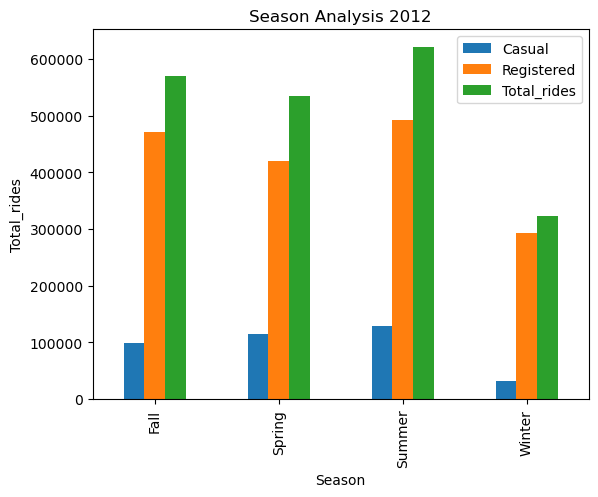

In [29]:
#sns.barplot(data=season_analysis_result)
season_analysis_result.plot.bar()
plt.title("Season Analysis 2012")
plt.ylabel("Total_rides")

In [30]:
season_analysis_2012_copy.drop(["Total_rides"], axis=1, inplace=True)

In [31]:
season_analysis_2012_copy

,Season,Casual,Registered
0,Winter,686,1608
1,Winter,244,1707
2,Winter,89,2147
3,Winter,95,2273
4,Winter,140,3132
...,...,...,...
361,Winter,247,1867
362,Winter,644,2451
363,Winter,159,1182
364,Winter,364,1432


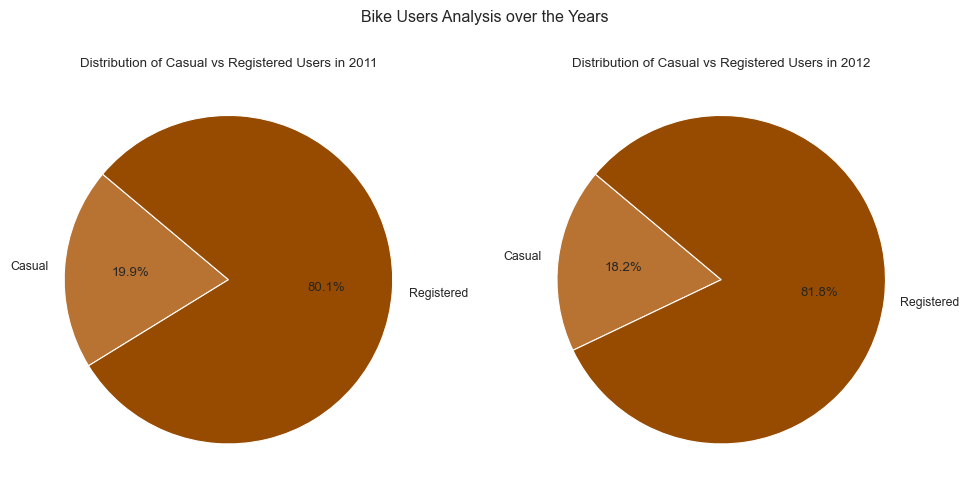

In [50]:
import matplotlib.pyplot as plt

# Assuming daily_2021 is a DataFrame containing the daily user data for 2023
sizes = day_2011[['Casual', 'Registered']].sum()  # Calculate the total number of casual and registered users
sizes0 = day_2012[['Casual', 'Registered']].sum()
labels = ['Casual', 'Registered']

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Define colors
colors = ['#b87333', '#964b00']  # Copper and brown colors

# Plot the pie chart for the first subplot
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Distribution of Casual vs Registered Users in 2011')

axes[1].pie(sizes0, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Distribution of Casual vs Registered Users in 2012')

# Adjusting layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Increase the top margin

# Defining super title
plt.suptitle("Bike Users Analysis over the Years")

# Show the plot
plt.show()


Apperent Temperature

In [34]:
day_2012.head()

,instant,Date,Season,Holiday,Workingday,Temperature(°C),Apparent Temperature(°C),Relative humidty (%),Windspeed,Casual,Registered,Total_rides,Year,Is_holiday,Weekday,Month
0,366,2012-01-01,Winter,0,No,0.370000,0.375621,0.692500,0.192167,686,1608,2294,2012,No,Sun.,Jan.
1,367,2012-01-02,Winter,1,Yes,0.273043,0.252304,0.381304,0.329665,244,1707,1951,2012,Yes,Mon.,Jan.
2,368,2012-01-03,Winter,0,Yes,0.150000,0.126275,0.441250,0.365671,89,2147,2236,2012,No,Tue.,Jan.
3,369,2012-01-04,Winter,0,Yes,0.107500,0.119337,0.414583,0.184700,95,2273,2368,2012,No,Wed.,Jan.
4,370,2012-01-05,Winter,0,Yes,0.265833,0.278412,0.524167,0.129987,140,3132,3272,2012,No,Thur.,Jan.


Text(0.5, 1.0, 'Ride Count based on Daily Apperent Temperature in 2012')

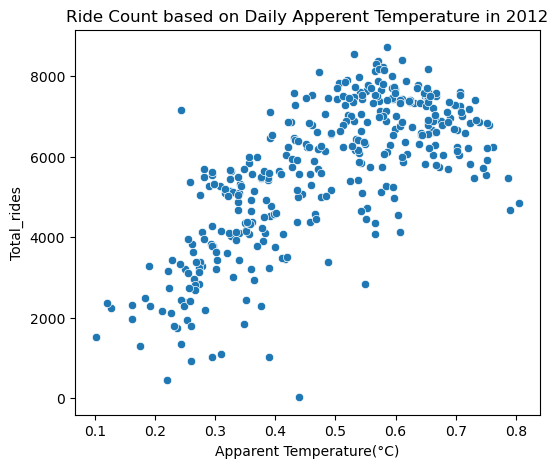

In [35]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Apparent Temperature(°C)", y="Total_rides",
      
             data=day_2012)
plt.title("Ride Count based on Daily Apperent Temperature in 2012")

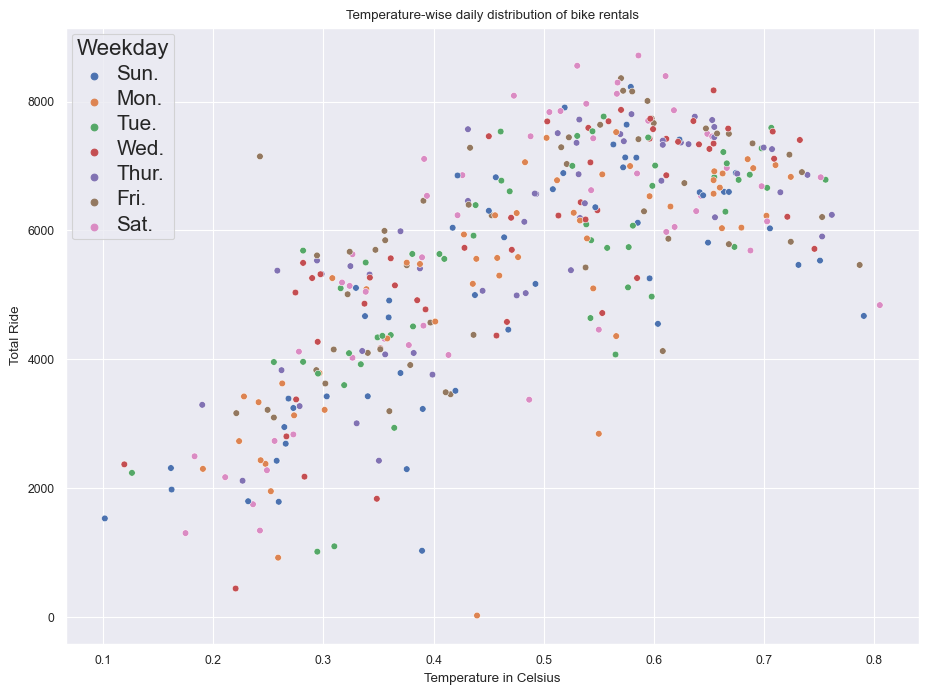

In [36]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("darkgrid")

#fig, ax = plt.subplots()
ax = sns.scatterplot(data = day_2012, x = 'Apparent Temperature(°C)', y = 'Total_rides',
               hue = 'Weekday');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Temperature-wise daily distribution of bike rentals',ylabel= 'Total Ride', xlabel='Temperature in Celsius')
plt.savefig("Temperature-wise daily distribution of bike rentals", dpi = 80)

Windspeed Analysis

Text(0.5, 1.0, 'Windspeed Distribution of Bike Total Rides 2012')

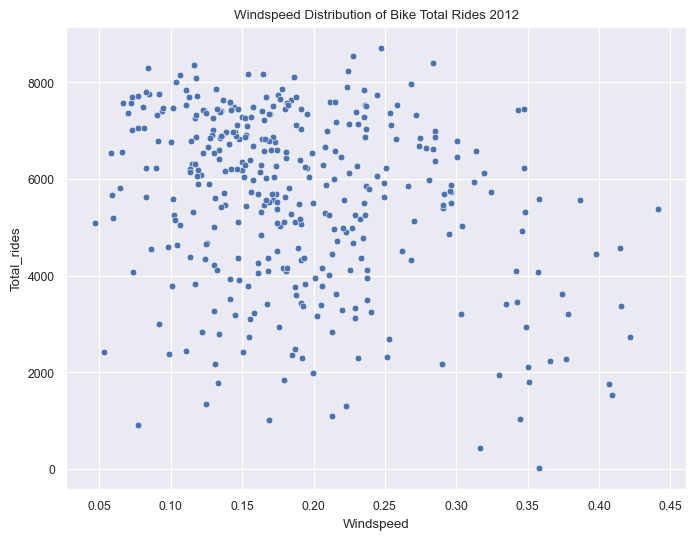

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Windspeed", y="Total_rides",
             #hue="Season",
             data=day_2012)
plt.title("Windspeed Distribution of Bike Total Rides 2012")

Bike sharing growth Analysis based on Total rides over the Years

Text(0.5, 1.0, 'Bike Share Growth Based On Total Rides')

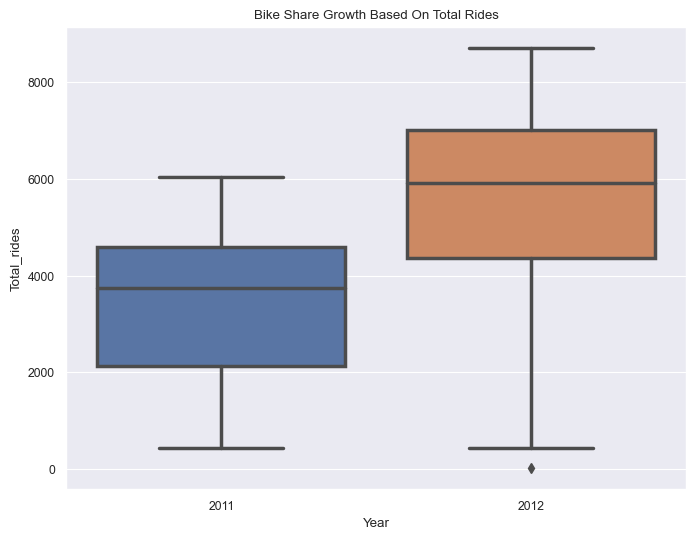

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(day, x="Year",y="Total_rides")
plt.title("Bike Share Growth Based On Total Rides")

In [40]:
day_2011["Total_rides"].mean().round(2)

3405.76

In [41]:
day_2012["Total_rides"].mean().round(2)

5599.93

In [42]:
def calculate_growth_rate(original_value, new_value):
    growth_rate = ((new_value - original_value) / original_value) * 100
    return growth_rate

# Example usage:
original_value = 3405.76
new_value = 5599.93
growth_rate = calculate_growth_rate(original_value, new_value)
print("Growth rate:", growth_rate)


Growth rate: 64.42526778164051


In [43]:
import folium

# Initialize the map at a starting location
mymap = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Data for start stations and their locations
start_stations = [
    {"station": "New Hampshire Ave & T St NW", "location": (38.915544, -77.038252)},
    {"station": "Columbus Circle / Union Station", "location": (38.89696, -77.00493)},
    {"station": "15th & P St NW", "location": (38.90980062655191, -77.03442692756653)},
    {"station": "1st & M St NE", "location": (38.905697, -77.005483)},
    {"station": "Smithsonian-National Mall / Jefferson Dr & 12th St SW", "location": (38.888774, -77.028694)},
    {"station": "Henry Bacon Dr & Lincoln Memorial Circle NW", "location": (38.890539, -77.049383)},
    {"station": "5th & K St NW", "location": (38.90304, -77.019027)},
    {"station": "14th & V St NW", "location": (38.9177645, -77.032096)},
    {"station": "Lincoln Memorial", "location": (38.888255, -77.0494365)},
    {"station": "Massachusetts Ave & Dupont Circle NW", "location": (38.9101, -77.0444)}
]

# Add markers for start stations to the map
for start_station in start_stations:
    folium.Marker(location=start_station["location"], popup=start_station["station"]).add_to(mymap)

# Save the map
mymap


In [44]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Example DataFrame
data = {
    'Start_station': [
        'New Hampshire Ave & T St NW',
        'Columbus Circle / Union Station',
        '15th & P St NW',
        '1st & M St NE',
        'Smithsonian-National Mall / Jefferson Dr & 12th St SW',
        'Henry Bacon Dr & Lincoln Memorial Circle NW',
        '5th & K St NW',
        '14th & V St NW',
        'Lincoln Memorial',
        'Massachusetts Ave & Dupont Circle NW'
    ],
    'Start_location': [
        (38.915544, -77.038252),
        (38.89696, -77.00493),
        (38.90980062655191, -77.03442692756653),
        (38.905697, -77.005483),
        (38.888774, -77.028694),
        (38.890539, -77.049383),
        (38.90304, -77.019027),
        (38.9177645, -77.032096),
        (38.888255, -77.0494365),
        (38.9101, -77.0444)
    ],
    'Frequency': [
        90916, 88749, 80874, 74642, 73037,
        72609, 67497, 64552, 63439, 63328
    ]
}

df = pd.DataFrame(data)

# Create a map centered around Washington, D.C.
map_dc = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(map_dc)

# Add markers for each station
for index, row in df.iterrows():
    folium.Marker(
        location=row['Start_location'],  # Use Start_location for marker location
        popup=f"Station: {row['Start_station']}<br>Frequency: {row['Frequency']}",
        icon=None,
    ).add_to(marker_cluster)

# display map
map_dc
